In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [9]:
# Load the dataset
file_path = "C:\\Users\\Dhanush\\Downloads\\MS.csv"
car_data = pd.read_csv(file_path)

# Display basic info
print("Dataset Overview:")
display(car_data.head())
print("\nSummary Statistics:")
display(car_data.describe())

Dataset Overview:


,name,year,seller_type,transmission,owner,count_of_cars,avg_selling_price,min_selling_price,max_selling_price
0,Ambassador CLASSIC 1500 DSL AC,2005,Individual,Manual,Second Owner,2,120000.0,120000,120000
1,Ambassador Classic 2000 Dsz,2002,Individual,Manual,Fourth & Above Owner,1,50000.0,50000,50000
2,Ambassador Grand 1800 ISZ MPFI PW CL,2012,Individual,Manual,Second Owner,1,430000.0,430000,430000
3,Audi A4 1.8 TFSI,2012,Individual,Automatic,Third Owner,1,1200000.0,1200000,1200000
4,Audi A4 2.0 TDI,2011,Dealer,Automatic,First Owner,1,1295000.0,1295000,1295000



Summary Statistics:


,year,count_of_cars,avg_selling_price,min_selling_price,max_selling_price
count,3025.000000,3025.000000,3.025000e+03,3.025000e+03,3.025000e+03
mean,2012.830083,1.434711,4.853806e+05,4.800738e+05,4.909720e+05
std,4.324650,1.139908,5.338018e+05,5.329928e+05,5.353142e+05
min,1992.000000,1.000000,2.000000e+04,2.000000e+04,2.000000e+04
25%,2010.000000,1.000000,2.000000e+05,2.000000e+05,2.000000e+05
50%,2013.000000,1.000000,3.500000e+05,3.500000e+05,3.500000e+05
75%,2016.000000,2.000000,6.000000e+05,6.000000e+05,6.000000e+05
max,2020.000000,14.000000,8.900000e+06,8.900000e+06,8.900000e+06


In [15]:
# Segmenting the market based on car attributes
segmentation = car_data.groupby(['name', 'year', 'seller_type', 'transmission', 'owner']).agg(
    count_of_cars=('max_selling_price', 'count'),
    avg_selling_price=('max_selling_price', 'mean'),
    min_selling_price=('max_selling_price', 'min'),
    max_selling_price=('max_selling_price', 'max')
).reset_index()


segmentation.to_csv("Car_Segmentation.csv", index=False)
print("Market segmentation saved to 'Car_Segmentation.csv'")

Market segmentation saved to 'Car_Segmentation.csv'


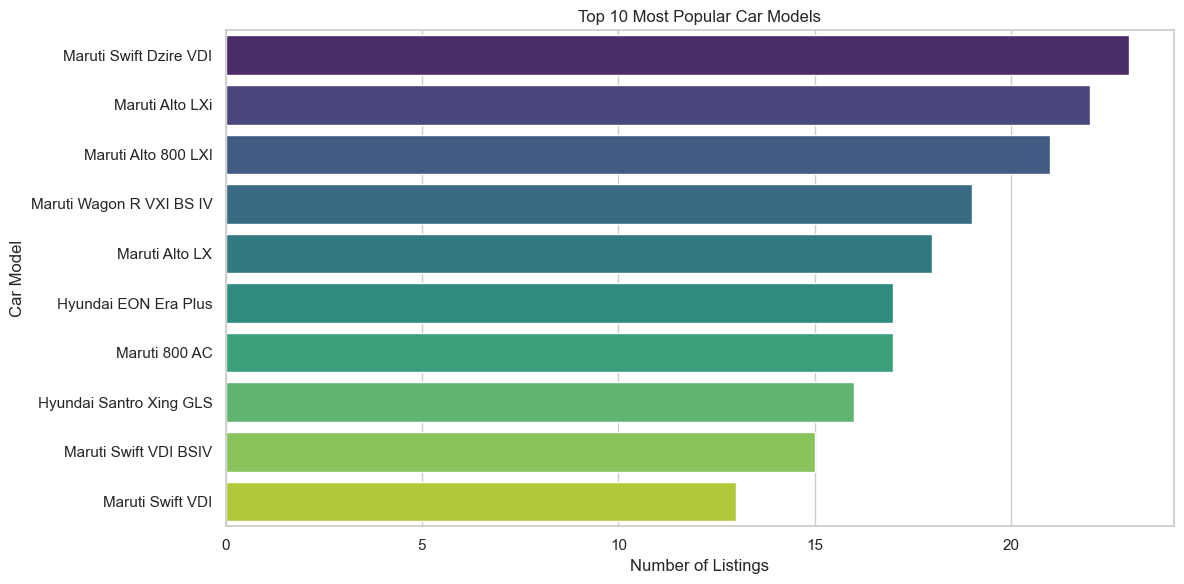

In [10]:
#Top 10 Most Popular Car Models
plt.figure(figsize=(12, 6))
top_cars = car_data['name'].value_counts().nlargest(10)
sns.barplot(x=top_cars.values, y=top_cars.index, palette="viridis")
plt.title('Top 10 Most Popular Car Models')
plt.xlabel('Number of Listings')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

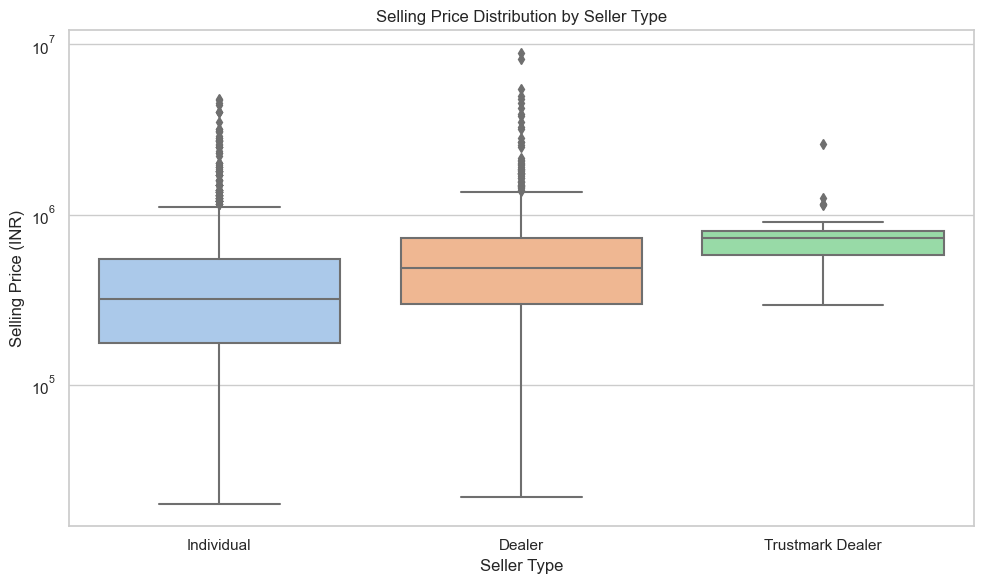

In [16]:
#Selling Price by Seller Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='seller_type', y='max_selling_price', data=car_data, palette="pastel")
plt.title('Selling Price Distribution by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price (INR)')
plt.yscale('log')  # Log scale to handle outliers
plt.tight_layout()
plt.show()

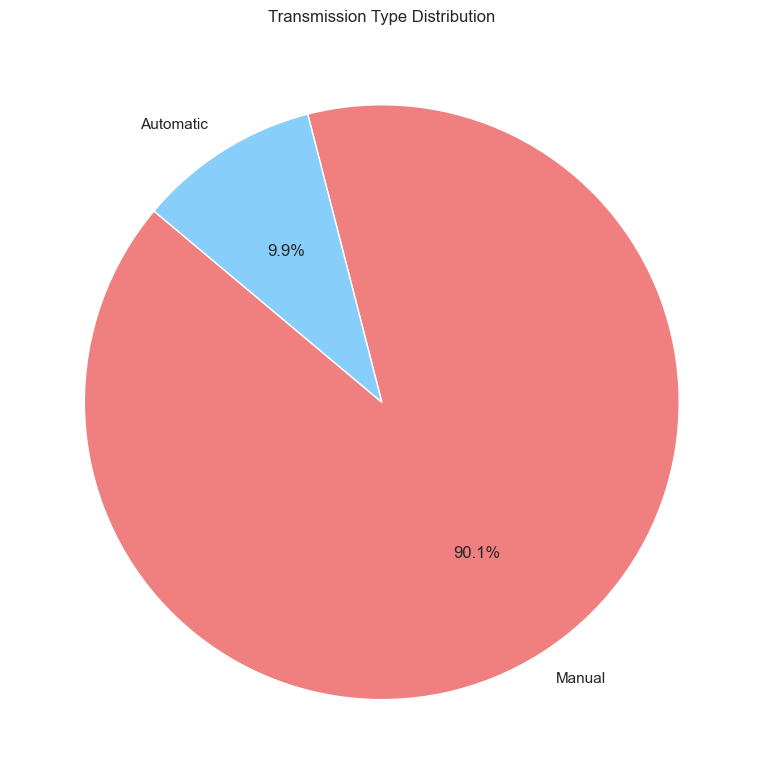

In [11]:
#Transmission Type Distribution
transmission_counts = car_data['transmission'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Transmission Type Distribution')
plt.tight_layout()
plt.show()

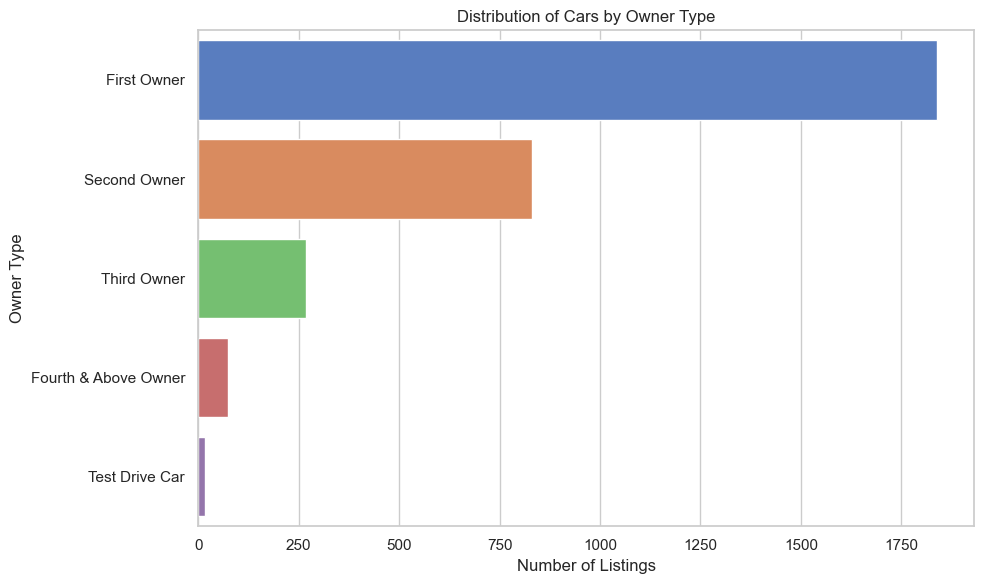

In [17]:
#Distribution by Owner Type
plt.figure(figsize=(10, 6))
owner_counts = car_data['owner'].value_counts()
sns.barplot(x=owner_counts.values, y=owner_counts.index, palette="muted")
plt.title('Distribution of Cars by Owner Type')
plt.xlabel('Number of Listings')
plt.ylabel('Owner Type')
plt.tight_layout()
plt.show()

In [18]:
print("Analysis completed. Key findings:")
print("- Maruti, Hyundai, and Honda are top listed brands.")
print("- Manual transmission is more common but automatics are growing.")
print("- First-owner cars dominate and retain higher resale value.")
print("- Dealers list cars at higher average prices.")

Analysis completed. Key findings:
- Maruti, Hyundai, and Honda are top listed brands.
- Manual transmission is more common but automatics are growing.
- First-owner cars dominate and retain higher resale value.
- Dealers list cars at higher average prices.
